# Sequential Backward Selection
Sequential backward selection is another wrapper method for feature selection. It is very similar to sequential forward selection, but there is __one key difference__. Instead of starting with no features and adding one feature at a time, sequential backward selection __starts with all of the available features and removes one feature at a time__.

Let’s again say we want to use three of the following five features: age, height, weight, blood_pressure, and resting_heart_rate. Sequential backward selection will start by training whatever machine learning model you are using on five different feature subsets, one for each possible feature removal:

- {height, weight, blood_pressure, resting_heart_rate}
- {age, weight, blood_pressure, resting_heart_rate}
- {age, height, blood_pressure, resting_heart_rate}
- {age, height, weight, resting_heart_rate}
- {age, height, weight, blood_pressure}

Let’s say that out of the five subsets, the model performed best on the subset without blood_pressure. Then the algorithm will proceed with the feature set {age, height, weight, resting_heart_rate}. It then tries removing each of age, height, weight, and resting_heart_rate.

Let’s say that of those four subsets, the model performed best without weight. Then it will arrive at the subset {age, height, resting_heart_rate}. The algorithm will stop there since it arrived at the desired number of features.

To implement sequential backward selection in `mlxtend` you can use the same `SFS` class you used for sequential forward selection. The only difference is that you have to set the parameter forward to False.

In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
health = pd.read_csv("dataR2.csv")
X = health.iloc[:,:-1]
y = health.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential backward selection
sbs = SFS(lr,
          k_features=3,
          forward=False, # <-------
          floating=False,
          scoring='accuracy',
          cv=0)

# Fit sbs to X and y
sbs.fit(X,y)


SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          forward=False, k_features=(3, 3), scoring='accuracy')

## Evaluating the Result of Sequential Backward Selection

In [7]:
print(sbs.subsets_)

{9: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7, 8), 'cv_scores': array([0.80172414]), 'avg_score': np.float64(0.8017241379310345), 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1')}, 8: {'feature_idx': (0, 1, 2, 3, 4, 5, 6, 7), 'cv_scores': array([0.80172414]), 'avg_score': np.float64(0.8017241379310345), 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin')}, 7: {'feature_idx': (0, 1, 2, 3, 4, 5, 7), 'cv_scores': array([0.80172414]), 'avg_score': np.float64(0.8017241379310345), 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Resistin')}, 6: {'feature_idx': (0, 1, 2, 3, 5, 7), 'cv_scores': array([0.80172414]), 'avg_score': np.float64(0.8017241379310345), 'feature_names': ('Age', 'BMI', 'Glucose', 'Insulin', 'Leptin', 'Resistin')}, 5: {'feature_idx': (0, 1, 2, 3, 7), 'cv_scores': array([0.79310345]), 'avg_score': np.float64(0.7931034482758621), 'feature_names': ('

In [10]:
print(sbs.subsets_[7]['feature_names'])

('Age', 'BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Resistin')


In [11]:
print(sbs.subsets_[7]['avg_score'])

0.8017241379310345


In [12]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

/Users/zero/Documents/algorithm/Python_Intermediate/venv/lib/python3.10/site-packages/mlxtend/feature_selection/sequential_feature_selector.py:895: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  std_err = scipy.stats.sem(ary)


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Number of Features', ylabel='Performance'>)

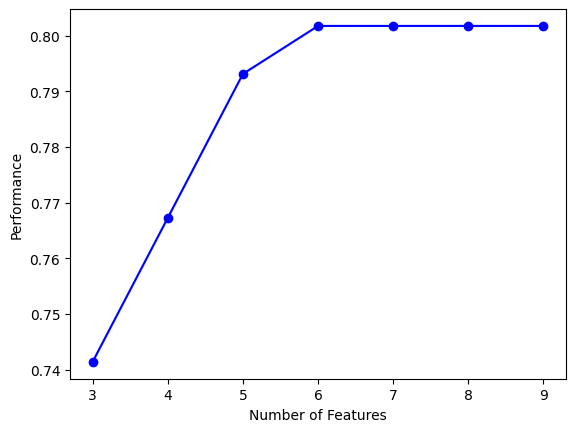

In [13]:
plot_sfs(sbs.get_metric_dict()) 